In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')


In [2]:
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('ratings.csv')

In [3]:
movies.shape

(9742, 3)

In [4]:
ratings.shape

(100836, 4)

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
len(ratings['userId'].unique())

610

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
A= ratings.groupby('movieId')['rating'].count().reset_index()

In [9]:
A

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [10]:
A[A['rating']==A['rating'].max()]

,movieId,rating
314,356,329


In [11]:
movies[movies['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [12]:
tags = pd.read_csv('tags.csv')

In [13]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
movies[movies['title']=="Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [15]:
tags[tags['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [16]:
movies[movies['title']=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [17]:
ratings['rating'][ratings['movieId']==589].mean()

3.970982142857143

In [18]:
movies[movies['title']=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [19]:
rate = ratings['rating'][ratings['movieId']==2959]

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

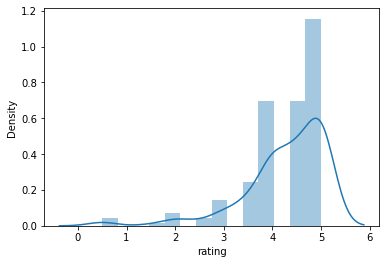

In [20]:
sns.distplot(rate)

In [21]:
rate1 = ratings.groupby('movieId')['rating'].mean().reset_index()

In [22]:
rate1

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [23]:
merged_df = pd.merge(movies, rate1, on='movieId', how='inner')

In [24]:
merged_df

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9721,193585,Flint (2017),Drama,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [25]:
merged_df[merged_df['rating']==merged_df['rating'].max()]

,movieId,title,genres,rating
48,53,Lamerica (1994),Adventure|Drama,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.0
405,467,Live Nude Girls (1995),Comedy,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0
...,...,...,...,...
9593,176601,Black Mirror,(no genres listed),5.0
9615,179133,Loving Vincent (2017),Animation|Crime|Drama,5.0
9616,179135,Blue Planet II (2017),Documentary,5.0
9670,184245,De platte jungle (1978),Documentary,5.0


In [26]:
len(merged_df['rating'].unique())

1286

In [27]:
rate2 = ratings.groupby('movieId')['rating'].count().reset_index()

In [28]:
rate2

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [29]:
merged_df1 = pd.merge(movies, rate2, on='movieId', how='inner')

In [30]:
merged_df1

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7
4,5,Father of the Bride Part II (1995),Comedy,49
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1
9721,193585,Flint (2017),Drama,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1


In [31]:
merged_df1[merged_df1['rating']==merged_df1['rating'].max()]

,movieId,title,genres,rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329


In [32]:
top_5_results = merged_df1.nlargest(5, 'rating')

In [33]:
top_5_results

,movieId,title,genres,rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278


In [34]:
sub = merged_df1[merged_df1['genres'].str.contains('Sci-Fi')]

In [35]:
sub

,movieId,title,genres,rating
23,24,Powder (1995),Drama|Sci-Fi,28
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,38
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,9
68,76,Screamers (1995),Action|Sci-Fi|Thriller,15
...,...,...,...,...
9695,188301,Ant-Man and the Wasp (2018),Action|Adventure|Comedy|Fantasy|Sci-Fi,3
9704,189547,Iron Soldier (2010),Action|Sci-Fi,1
9706,190183,The Darkest Minds (2018),Sci-Fi|Thriller,1
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,1


In [36]:
top_5_sci_fi = sub.nlargest(5, 'rating')

In [37]:
top_5_sci_fi

,movieId,title,genres,rating
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211


In [38]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [39]:
links.shape

(9742, 3)

In [40]:
len(links['movieId'].unique())

9742

In [41]:
import requests
from bs4 import BeautifulSoup

In [42]:
sub1 = merged_df1[merged_df1['rating']>50]

In [43]:
sub1

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
5,6,Heat (1995),Action|Crime|Thriller,102
6,7,Sabrina (1995),Comedy|Romance,54
...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59


In [44]:
merged_links = pd.merge(sub1, links, on='movieId', how='inner')

In [45]:
merged_links

,movieId,title,genres,rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,114319,11860.0
...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,2015381,118340.0


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_imdb_reviews(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews?ref_=tt_ql_3"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = soup.find_all('span', class_='sc-16ede01-2 bCkqyZ')  
    review_texts = [review.text for review in reviews]
    return review_texts
view = scrape_imdb_reviews(merged_links['imdbId'][1])

In [ ]:
view

In [ ]:
def extract_content(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id  
    url = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(url,headers=request_header) 
    if response.status_code == 200:     
        soup = BeautifulSoup(response.text, 'html.parser')     
        content=soup.findAll(attrs={'class':'sc-bde20123-1 cMEQkK'})     
        content=content[0].text     
        text=content 
        return float(text)
    else:
        print(f"Error: Unable to fetch content. Status code {response.status_code}")
merged_links['imdb_rating'] = merged_links['imdbId'].apply(extract_content)



In [ ]:
view

In [ ]:
merged_links

In [ ]:
merged_links.sort_values(by='imdb_rating', ascending=False).head(1)


In [ ]:
merged_sub_data = merged_links[merged_links['genres'].str.contains('Sci-Fi')]

In [ ]:
top_5_sci_fi = merged_sub_data.nlargest(5, 'imdb_rating')

In [ ]:
top_5_sci_fi